# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
try:
    data = pd.read_csv('C:/Users/Ксения/data_analyst/Страховая/****nce.csv')
except:
    data = pd.read_csv('/datasets/****nce.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
# Обработка данных
data = data.drop_duplicates()
data.columns = data.columns.str.lower()
data[['возраст', 'зарплата']] = data[['возраст', 'зарплата']] .astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   пол                4847 non-null   int64
 1   возраст            4847 non-null   int64
 2   зарплата           4847 non-null   int64
 3   члены семьи        4847 non-null   int64
 4   страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


In [5]:
round(data.describe(),)

,пол,возраст,зарплата,члены семьи,страховые выплаты
count,4847.0,4847.0,4847.0,4847.0,4847.0
mean,0.0,31.0,39896.0,1.0,0.0
std,1.0,8.0,9973.0,1.0,0.0
min,0.0,18.0,5300.0,0.0,0.0
25%,0.0,24.0,33200.0,0.0,0.0
50%,0.0,30.0,40200.0,1.0,0.0
75%,1.0,37.0,46600.0,2.0,0.0
max,1.0,65.0,79000.0,6.0,5.0


В данных была проведена предобработка. Удалены возможные явные дубликаты, столбцы с  плавающий запятой приведены в целочисленный тип. В целом данные выглядят правдоподобно.

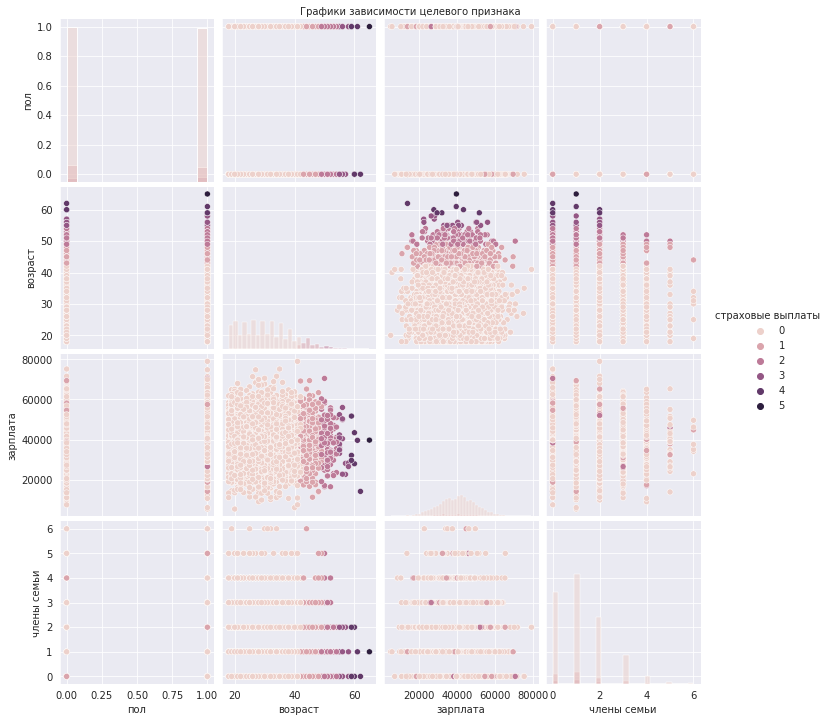

In [6]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='страховые выплаты', height=2.5, diag_kind='hist')
plt.suptitle("Графики зависимости целевого признака", y=1, fontsize=10)
plt.show()

In [7]:
features=data.drop(['страховые выплаты'],axis=1)
target=data['страховые выплаты']

In [8]:
random = 12345

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножим на матрицу:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

**Ответ:**  Качество линейной регрессии не изменится.


**Обоснование:**  
докажем $Xw = XPw1$


$$
X(X^T X)^{-1} X^T y = XP((XP)^T XP)^{-1} (XP)^T y 
$$

$$
(X^T X)^{-1} X^T = P((XP)^T XP)^{-1} (XP)^T
$$

$$
(X^T X)^{-1} X^T = P(P^T X^T XP)^{-1} (XP)^T
$$

$$
(X^T X)^{-1} X^T = PP^{-1}(X^T X)^{-1} X^TP^TP^{-T}
$$

$$
(X^T X)^{-1} X^T = (X^T X)^{-1} X^T
$$

Равенство подтверждено, что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**

Для шифрования выберем алгоритм умножения матрицы признаков на обратимую, которая в свою очередь будет формироваться случайным образом. В качестве иллючтрации процесса умножения, приведу формулу из теории:
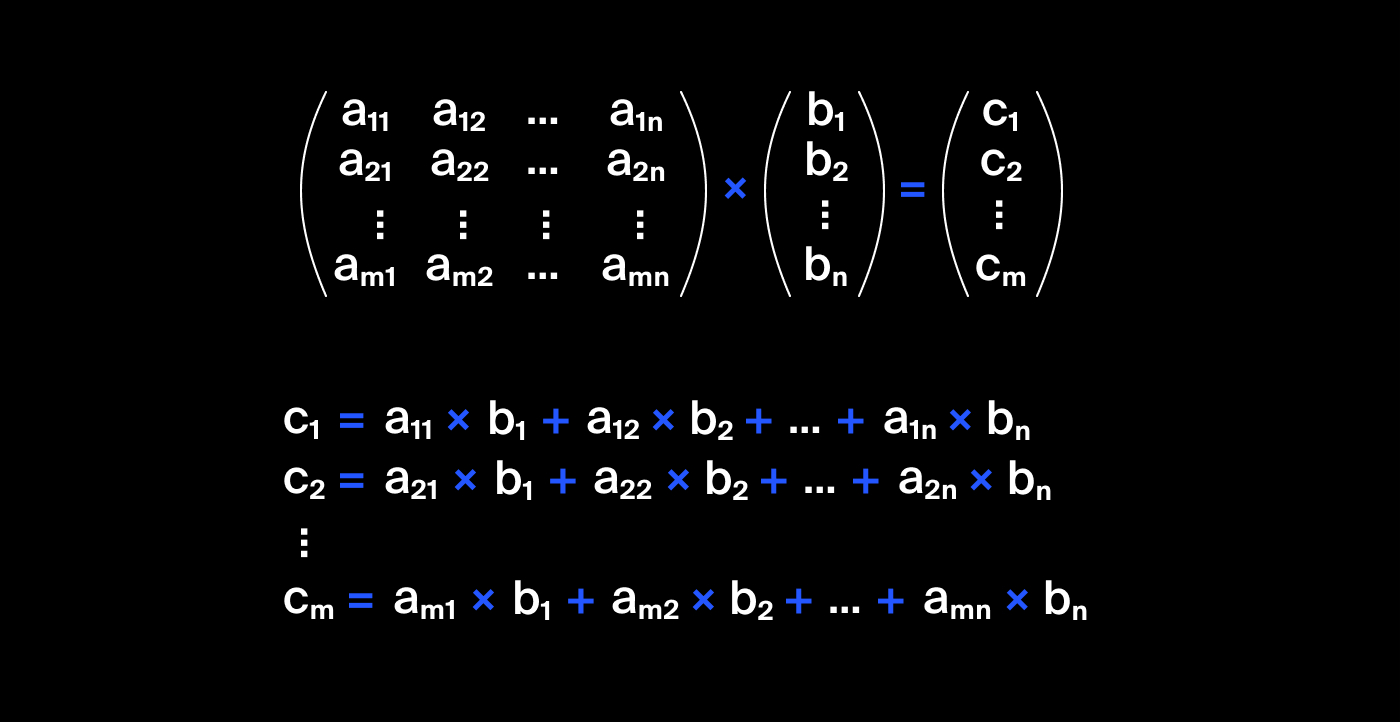


Последовательность действий:

- Создадим случайную матрицу (P)

- Проверка на возможную обратимость

- Если матрица P обратима, то выполняется умножение признаков на новую матрицу и обозначим её Создаём новую матрицу данных (Z)

- Присваиваем значение 1 новой измененной матрице

- Вычисляем вектор $ w = (X^T X)^{-1} X^T y $

- Предсказание модели методом умножения выбрки M и увеличиние на величину сдвига w0 значение. Переменную предсказанных значений обозначим a

- Проверим качество моделей r2 b MSE


**Обоснование**
Вышедоказанное равенство позволяет при умножении признаков на обратимую матрицу сделать предсказания в виде произведения  изменённой таблицы с признаками, умноженными на вектор, полученный из той же таблицы с изменёнными данными и увеличенный на ту же величину, что и признаки. 


## Проверка алгоритма

In [9]:
class LinearRegression:
    
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)        
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def fit_encryption_1(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.P = np.random.normal(0, 100, (5,5))
        Z = X @ self.P
        self.w = np.linalg.inv(Z.T @ Z) @ Z.T @ y
    
 
    def predict_1(self, features):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        a = X @ self.w
        return a
    
    def predict_encryption_1(self, features):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)        
        Z = X @ self.P
        a_1 = Z @ self.w
        return a_1   
    
    def fit_encryption_2(self, X, y):
        self.P = np.random.normal(0, 100, (4,4))
        try:
            p_inv = np.linalg.inv(self.P)
            Z = X @ self.P
            Z = np.concatenate((np.ones((Z.shape[0], 1)), Z), axis=1)
            self.w = np.linalg.inv(Z.T @ Z) @ Z.T @ y
        except:
            print('Матрица p необратима')
    
    def predict_2(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        a = X @ self.w
        return a
    
    def predict_encryption_2(self, X):
        self.Z = X @ self.P
        self.Z_ = np.concatenate((np.ones((self.Z.shape[0], 1)), self.Z), axis=1)
        a_1 = self.Z_ @ self.w
        return a_1
    

In [10]:
# прогнозная модель для матрицы признаков
model_1 = LinearRegression()
model_1.fit(features, target)
predictions_X = model_1.predict_1(features)


# прогнозная модель для зашифрованной матрицы
model_1.fit_encryption_1(features, target)
predictions_Z = model_1.predict_encryption_1(features)

print(predictions_X)
print(predictions_Z)

[ 0.51932879  0.69230097  0.09412745 ... -0.26164511 -0.19394186
  0.05044763]
[ 0.51933071  0.69230154  0.09412522 ... -0.26164707 -0.19394306
  0.05044771]


In [11]:
# Проверка качества модели
r2_lin1 = round(r2_score(target, predictions_Z), 3)
if round(r2_score(target, predictions_X), 3) == r2_lin1 :
    print('Качество модели не изменилось', r2_lin1)
elif round(r2_score(target, predictions_X), 3) < r2_lin1:
    print('Качество модели ухудшилось')    
else:
    print('Ошибка')    

Качество модели не изменилось 0.43


In [12]:
# прогнозная модель для матрицы признаков
model_2 = LinearRegression()
model_2.fit(features, target)
predictions_X = model_2.predict_2(features)


# прогнозная модель для зашифрованной матрицы
model_2.fit_encryption_2(features, target)
predictions_Z = model_2.predict_encryption_2(features)

print(predictions_X)
print(predictions_Z)

[ 0.51932879  0.69230097  0.09412745 ... -0.26164511 -0.19394186
  0.05044763]
[ 0.51932884  0.69230102  0.09412751 ... -0.26164506 -0.19394181
  0.05044768]


In [13]:
# Проверка качества модели
r2_lin2 = round(r2_score(target, predictions_Z), 3)
if round(r2_score(target, predictions_X), 3) == r2_lin2 :
    print('Качество модели не изменилось', r2_lin1)
elif round(r2_score(target, predictions_X), 3) < r2_lin2:
    print('Качество модели ухудшилось')    
else:
    print('Ошибка') 

Качество модели не изменилось 0.43


Целью данной работы было защита данных пользователей с помощью шифрования. ТЗ требовало сохранения качества данных посли шифровки. Для реализации данной задачи был выбран алгоритм преобразования данных с помощью умножения признаков исходных данных на обратимую матрицу, в результате появилась новая матрица зашифрованных данных. В качестве проверки использовалась метрика r2 
Показатели качества моделей подтверждены. А это значит, что выбранный алгоритм шифрования верен.